In [ ]:
!pip install opencv-python opencv-contrib-python

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the image
image = cv2.imread('/content/000072.jpg')

array([[[ 45,  43,  35],
        [ 50,  48,  40],
        [ 50,  48,  40],
        ...,
        [143, 134, 120],
        [141, 133, 116],
        [105,  97,  80]],

       [[ 31,  29,  21],
        [ 39,  37,  29],
        [ 47,  45,  37],
        ...,
        [107,  98,  84],
        [105,  96,  82],
        [ 79,  71,  54]],

       [[ 30,  28,  20],
        [ 35,  33,  25],
        [ 40,  38,  30],
        ...,
        [ 60,  52,  39],
        [ 58,  50,  37],
        [ 44,  37,  22]],

       ...,

       [[192, 182, 172],
        [192, 182, 172],
        [192, 182, 172],
        ...,
        [168, 145, 129],
        [170, 147, 131],
        [171, 148, 132]],

       [[192, 182, 172],
        [192, 182, 172],
        [192, 182, 172],
        ...,
        [168, 145, 129],
        [170, 147, 131],
        [171, 148, 132]],

       [[192, 182, 172],
        [192, 182, 172],
        [192, 182, 172],
        ...,
        [168, 145, 129],
        [170, 147, 131],
        [171, 148, 132]]], dtype=uint8)
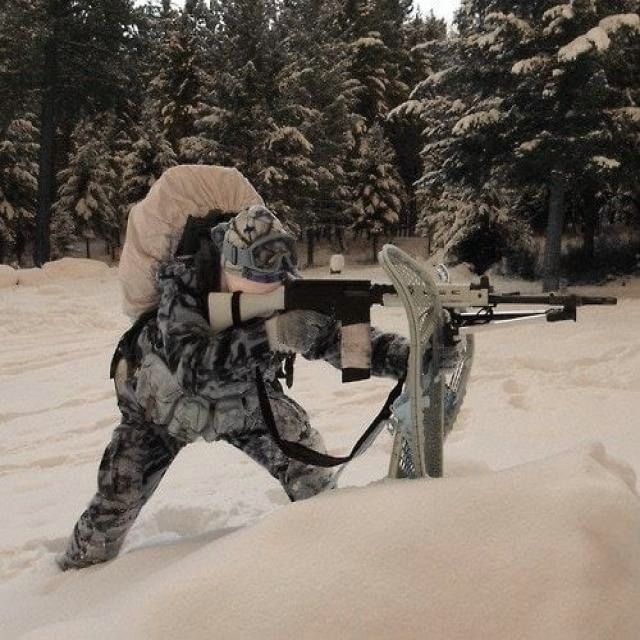

In [ ]:
image.view()

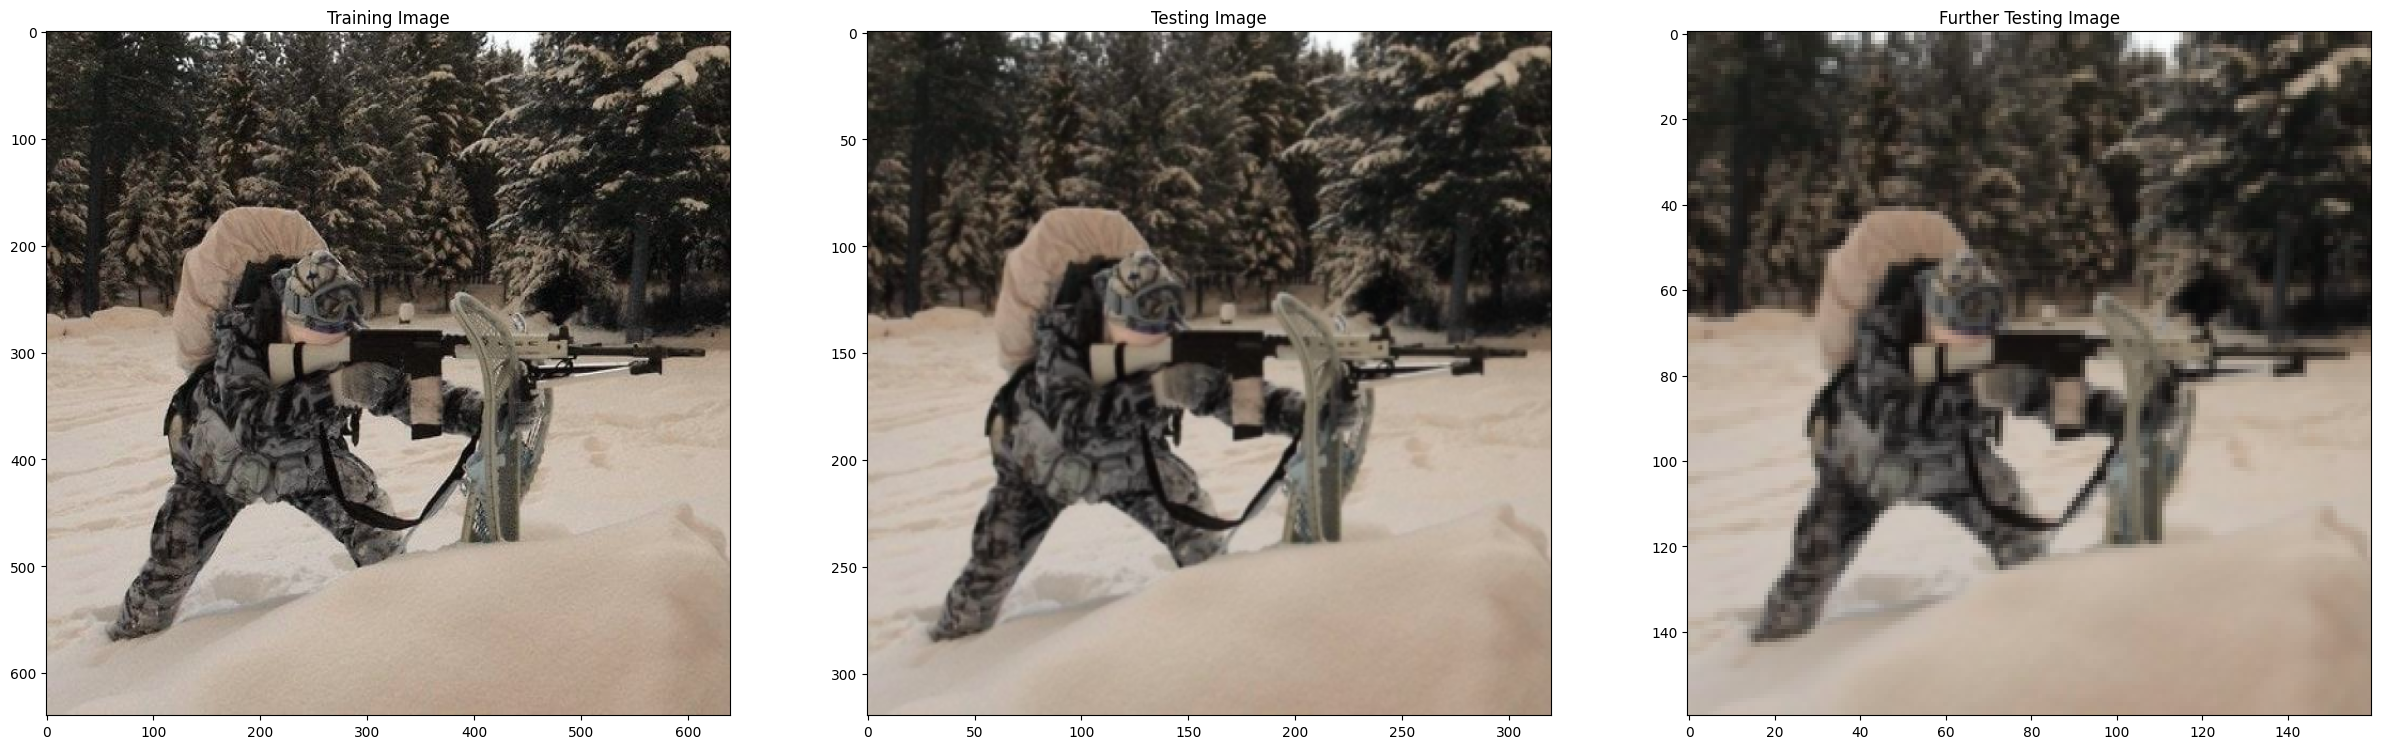

In [ ]:
# Convert the training image from BGR (blue, green, red) to RGB
training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image1 = cv2.pyrDown(training_image)  # pyrDown performs the downsampling step of the Gaussian pyramid construction, 1/2th the size of the orig im
test_image = cv2.pyrDown(test_image1)  # 1/4th the size of the orig im
num_rows, num_cols = test_image.shape[:2]

# Show original and downsampled images
fx, plots = plt.subplots(1, 3, figsize=(30,10))

plots[0].set_title("Training Image")
plots[0].imshow(cv2.cvtColor(training_image, cv2.COLOR_BGR2RGB))

plots[1].set_title("Testing Image")
plots[1].imshow(cv2.cvtColor(test_image1, cv2.COLOR_BGR2RGB))

plots[2].set_title("Further Testing Image")
plots[2].imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

plt.show()


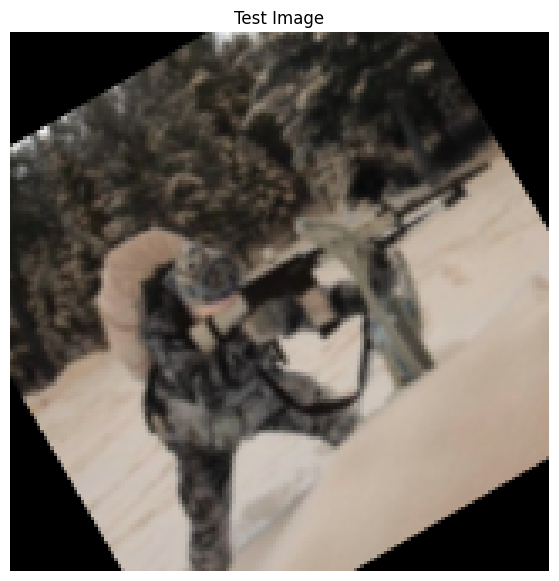

In [ ]:
# Creating a 2×3 matrix which is to be passed to cv2.warpAffine
rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)  # cv2.getRotationMatrix2D(center, angle, scale)
# Performing the affine transformation
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))  # cv2.warpAffine(src, M, dsize, dst, flags, borderMode, borderValue),

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

plt.title('Test Image')
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## SIFT

In [ ]:
# Set stricter thresholds for keypoint detection
sift = cv2.xfeatures2d.SIFT_create(
    nOctaveLayers=4,        # Default: 3, higher values = more keypoints
    contrastThreshold=0.1,  # Default: 0.04, higher values = fewer keypoints
    edgeThreshold=15,        # Default: 10, higher values = fewer keypoints near edges
    sigma=3.2               # Default: 1.6, smaller values = more sensitive to small features
)

Number of Keypoints Detected In The Training Image:  331
Number of Keypoints Detected In The Query Image:  50


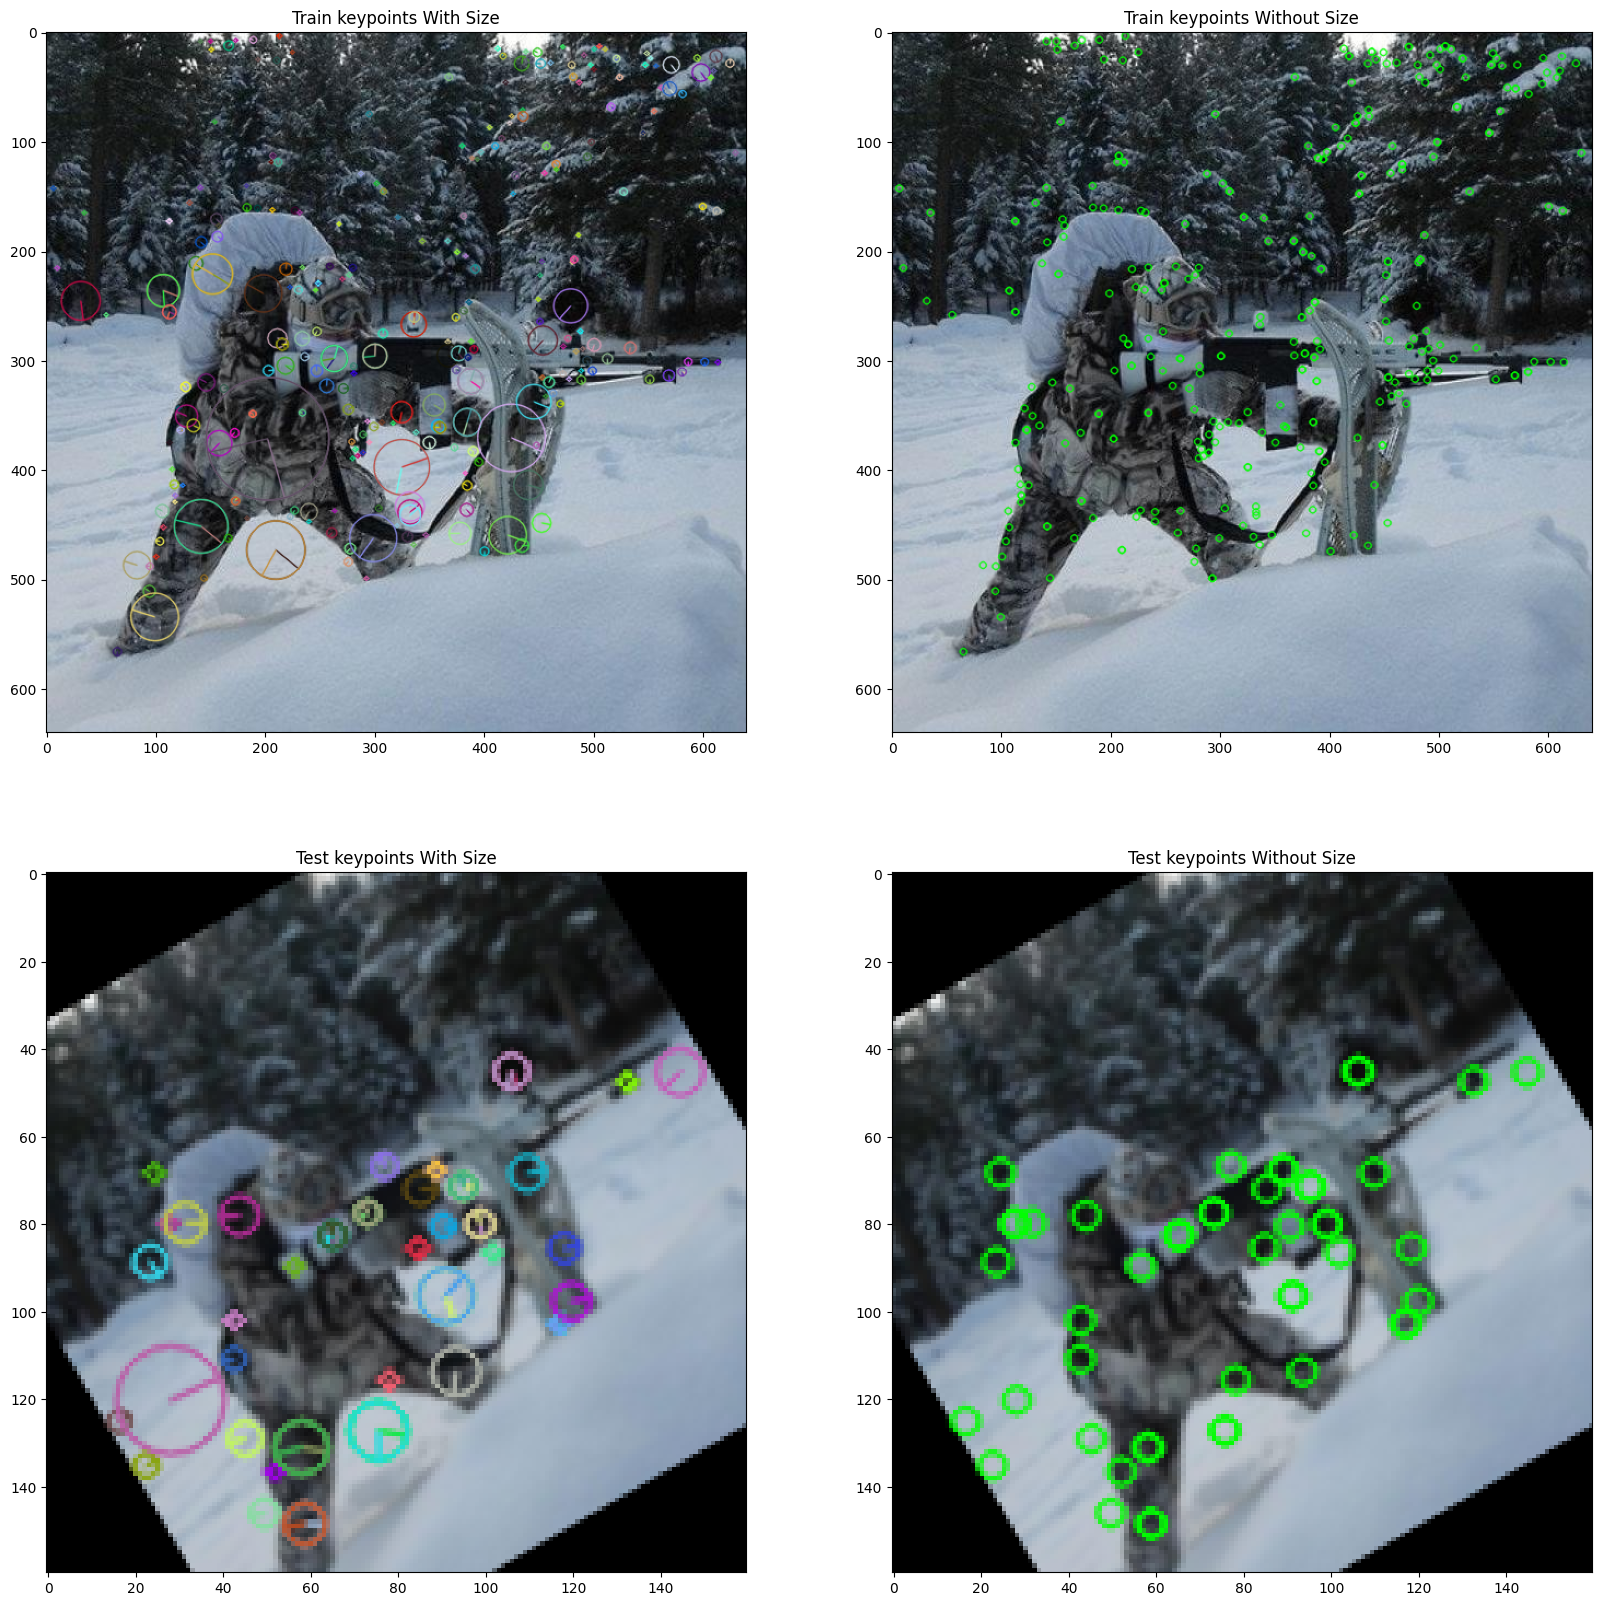

In [ ]:
# sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)
test_keypoints_without_size = np.copy(test_image)
test_keypoints_with_size = np.copy(test_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.drawKeypoints(test_image, test_keypoints, test_keypoints_without_size, color = (0, 255, 0))
cv2.drawKeypoints(test_image, test_keypoints, test_keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(2, 2, figsize=(20,20))

plots[0][0].set_title("Train keypoints With Size")
plots[0][0].imshow(keypoints_with_size, cmap='gray')

plots[0][1].set_title("Train keypoints Without Size")
plots[0][1].imshow(keypoints_without_size, cmap='gray')

plots[1][0].set_title("Test keypoints With Size")
plots[1][0].imshow(test_keypoints_with_size, cmap='gray')

plots[1][1].set_title("Test keypoints Without Size")
plots[1][1].imshow(test_keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

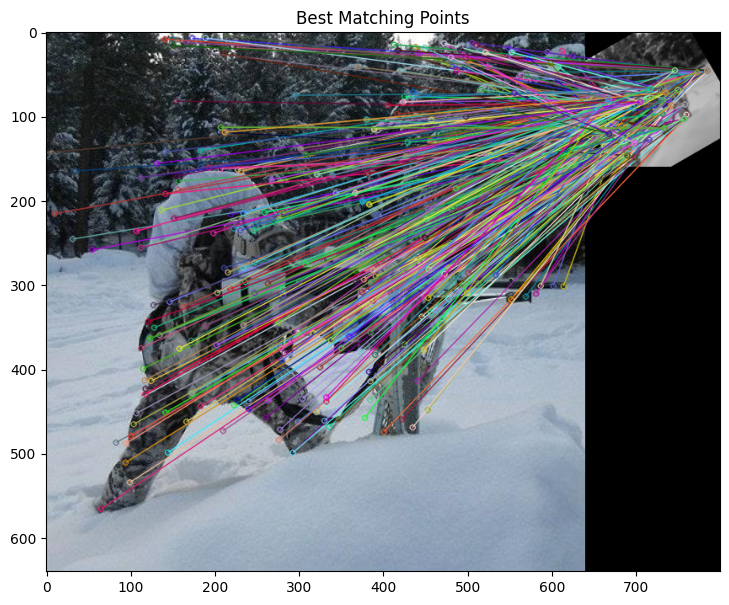


Number of Matching Keypoints Between The Training and Query Images:  331


In [ ]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

## SIFT from scratch

### *step 1* - The Gaussian Pyramid

In [ ]:
def gaussian_pyramid(image, levels=5):
    pyramid = [image]
    for i in range(1, levels):
        image = cv2.pyrDown(image)  # downsampling
        pyramid.append(image)
    return pyramid

# Loading the image
image_ = cv2.imread('/content/000072.jpg')
gray_image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2GRAY)

# Building the scale-space
pyramid = gaussian_pyramid(gray_image_)

In [ ]:
print(len(pyramid))

5


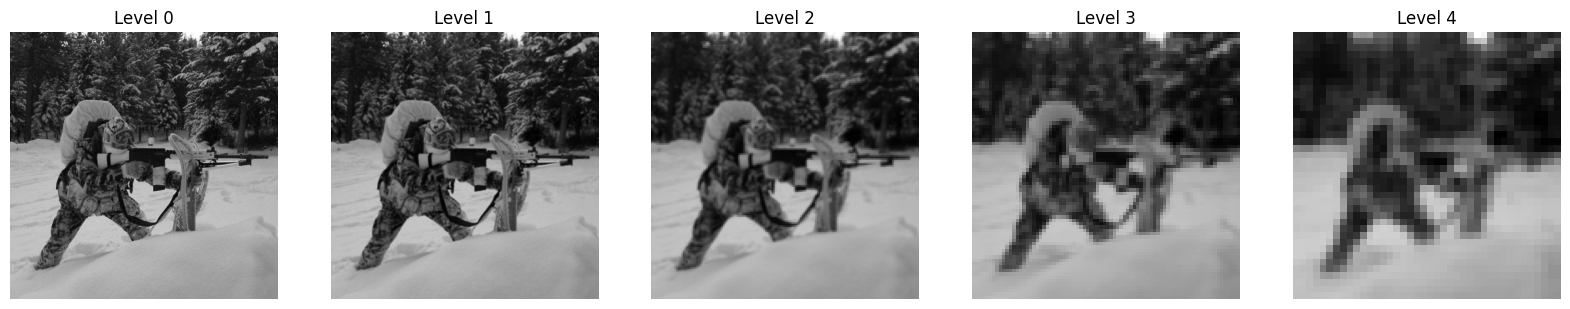

In [ ]:
plt.figure(figsize=(20, 20))
for i, img in enumerate(pyramid):
    plt.subplot(1, len(pyramid), i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Level {i}')
    plt.axis('off')
plt.show()

### *step 2* - Approximation with DoG(Difference of Gaussian kernel)


DOG is obtained as the difference of Gaussian blurring of an image with two different σ. This process is done for different octaves of the image in the Gaussian Pyramid.


DoG helps identify key points by highlighting regions of the image that are invariant to scale changes.

In [ ]:
def compute_dog(pyramid):
    dog_pyramid = []
    for i in range(1, len(pyramid)):
        prev = pyramid[i-1]
        curr = pyramid[i]
        # Resize the images to match sizes before subtraction
        resized_prev = cv2.resize(prev, (curr.shape[1], curr.shape[0]))
        # Subtract consecutive Gaussian images to get DoG
        dog = cv2.subtract(curr, resized_prev)
        dog_pyramid.append(dog)
    return dog_pyramid

# Compute DoG from the Gaussian pyramid
dog_pyramid = compute_dog(pyramid)

In [ ]:
print(len(dog_pyramid))

4


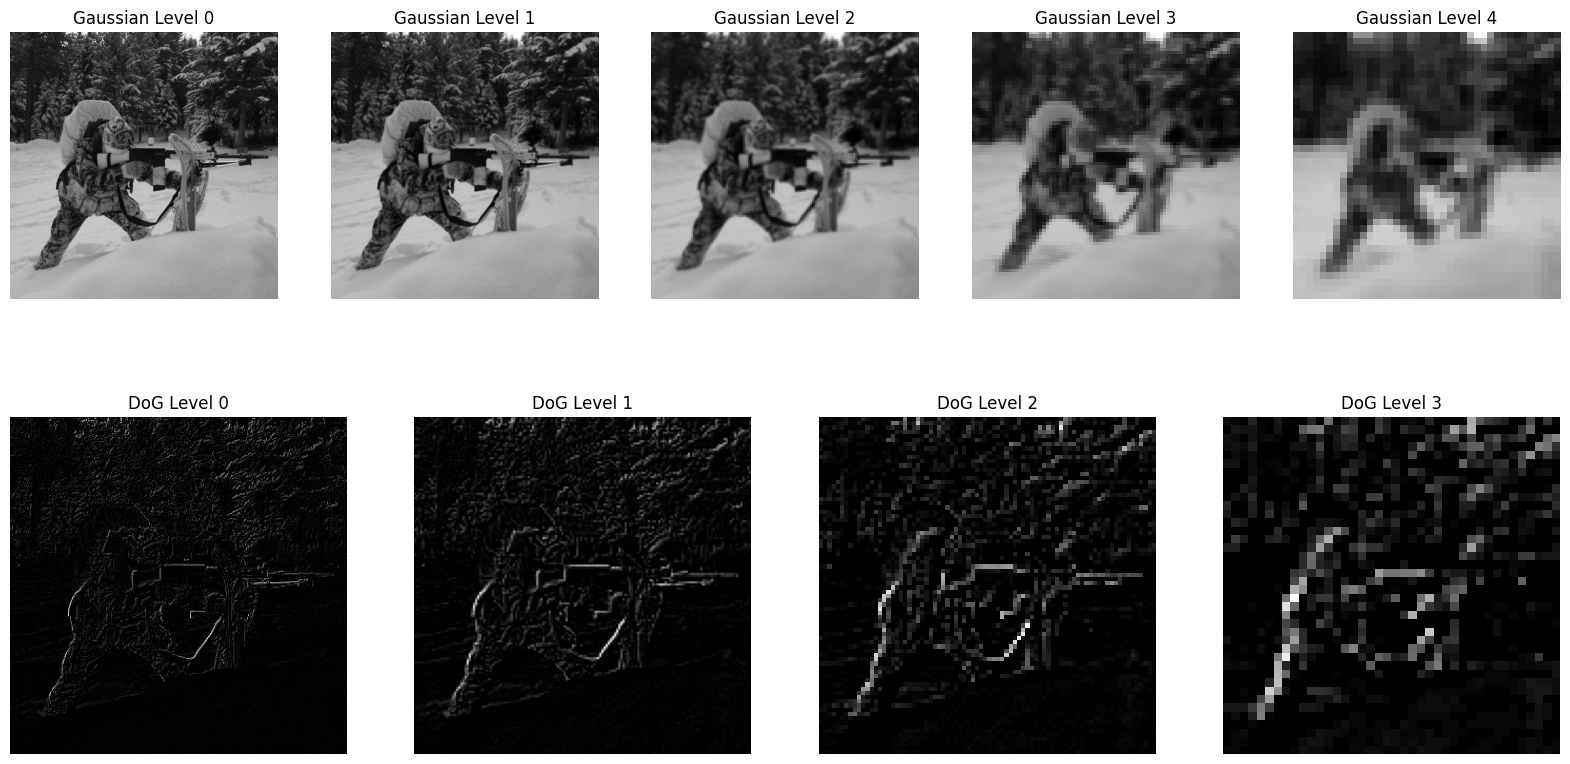

In [ ]:
# Visualize the Gaussian Pyramid and DoG images
plt.figure(figsize=(20, 10))

# Display the Gaussian Pyramid
for i, img in enumerate(pyramid):
    plt.subplot(2, len(pyramid), i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Gaussian Level {i}')
    plt.axis('off')

# Display the DoG Pyramid
for i, img in enumerate(dog_pyramid):
    plt.subplot(2, len(dog_pyramid), len(pyramid) + i)
    plt.imshow(img, cmap='gray')
    plt.title(f'DoG Level {i}')
    plt.axis('off')

plt.show()

### *alt. step 2* - LoG (Laplacian of Gaussian)


Peaks or valleys of the first-derivative of the
input signal, correspond to “zero-crossings”
of the second-derivative of the input signal.

Steps:

1. smoothing with Gaussian
2. applying Laplassian filter

In [ ]:
def compute_laplacian_of_gaussian(image, sigma):
    # Applying Gaussian filter
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)

    # Computing the Laplacian of the blurred image
    log = cv2.Laplacian(blurred, cv2.CV_64F)
    return log

log_pyramid = [compute_laplacian_of_gaussian(img, sigma=1.6) for img in pyramid]

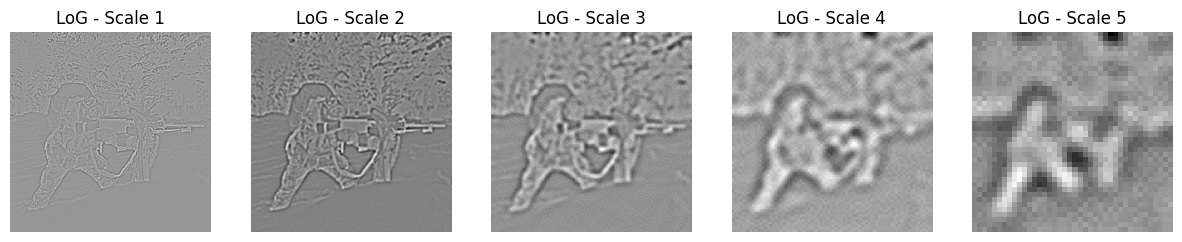

In [ ]:
fig, axes = plt.subplots(1, len(log_pyramid), figsize=(15, 5))
for i, log_img in enumerate(log_pyramid):
    ax = axes[i]
    ax.imshow(log_img, cmap='gray')
    ax.set_title(f'LoG - Scale {i+1}')
    ax.axis('off')

plt.show()

### *step 3* - Finding Keypoints

In [ ]:
def detect_keypoints(pyramid, threshold=100):
    keypoints = []
    for i in range(1, len(pyramid) - 1):
        img = pyramid[i]
        for y in range(1, img.shape[0] - 1):
            for x in range(1, img.shape[1] - 1):
                # Taking a local area 3*3
                patch = img[y-1:y+2, x-1:x+2]
                # Looking for local maxima or minima in the DoG/LoG
                if np.abs(patch).sum() > threshold:
                    keypoints.append((x, y, i))  # Store (x, y) position and pyramid level
    return keypoints

#### from DoG

In [ ]:
# Detect keypoints from the DoG images
keypoints = detect_keypoints(dog_pyramid)

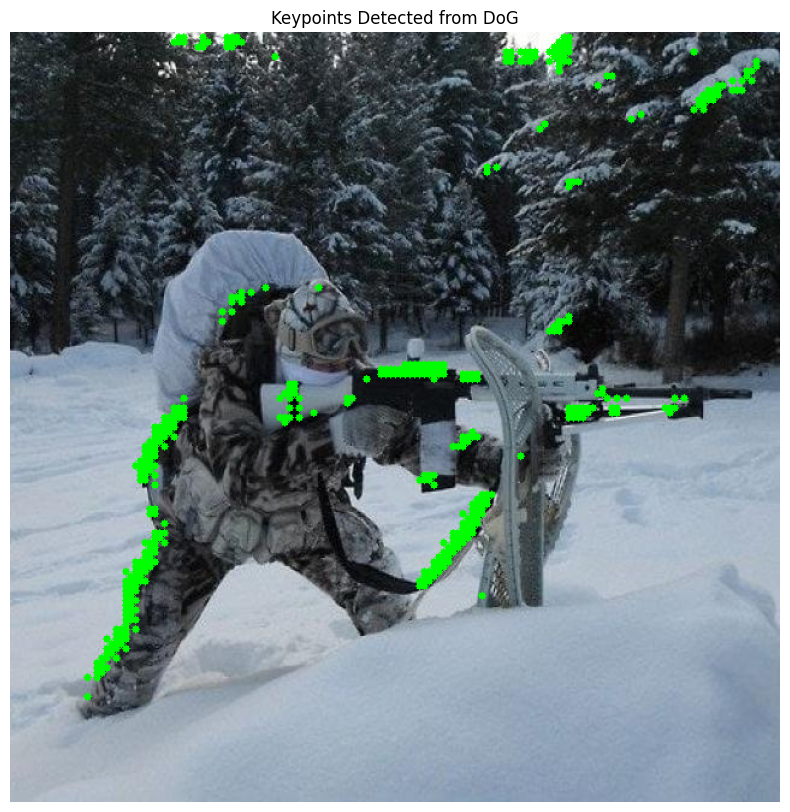

Number of keypoints detected: 516


In [ ]:
keypoints_image = np.copy(image_)

# rescaling the keypoints
for kp in keypoints:
    x, y, octave = kp
    octave += 1

    # Rescaling based on the octave level
    scale_factor = 2 ** octave  # Each octave represents a halving of the image size
    x_rescaled = int(x * scale_factor)
    y_rescaled = int(y * scale_factor)

    # Drawing the keypoints on the image
    cv2.circle(keypoints_image, (x_rescaled, y_rescaled), 3, (0, 255, 0), -1)

# Visualizing
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(keypoints_image, cv2.COLOR_BGR2RGB))
plt.title('Keypoints Detected from DoG')
plt.axis('off')
plt.show()

# Print the number of keypoints detected
print(f"Number of keypoints detected: {len(keypoints)}")

#### from LoG

In [ ]:
keypoints_log = detect_keypoints(log_pyramid)

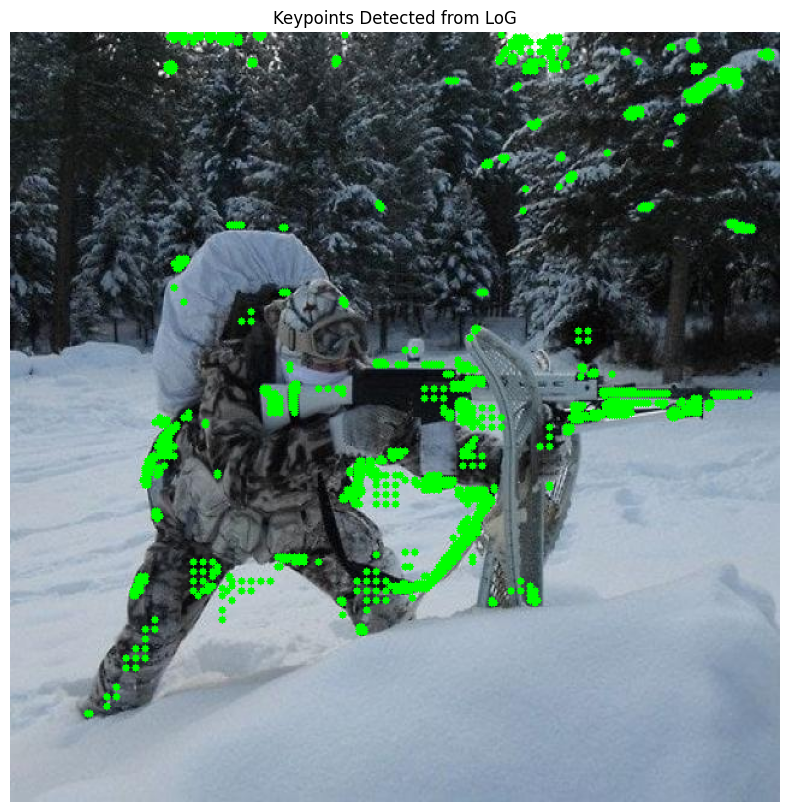

Number of keypoints detected: 1525


In [ ]:
keypoints_log_image = np.copy(image_)

# rescaling the keypoints
for kp in keypoints_log:
    x, y, octave = kp

    # Rescaling based on the octave level
    scale_factor = 2 ** octave  # Each octave represents a halving of the image size
    x_rescaled = int(x * scale_factor)
    y_rescaled = int(y * scale_factor)

    # Drawing the keypoints on the image
    cv2.circle(keypoints_log_image, (x_rescaled, y_rescaled), 3, (0, 255, 0), -1)

# Visualizing
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(keypoints_log_image, cv2.COLOR_BGR2RGB))
plt.title('Keypoints Detected from LoG')
plt.axis('off')
plt.show()

# Print the number of keypoints detected
print(f"Number of keypoints detected: {len(keypoints_log)}")

### Comparing Results

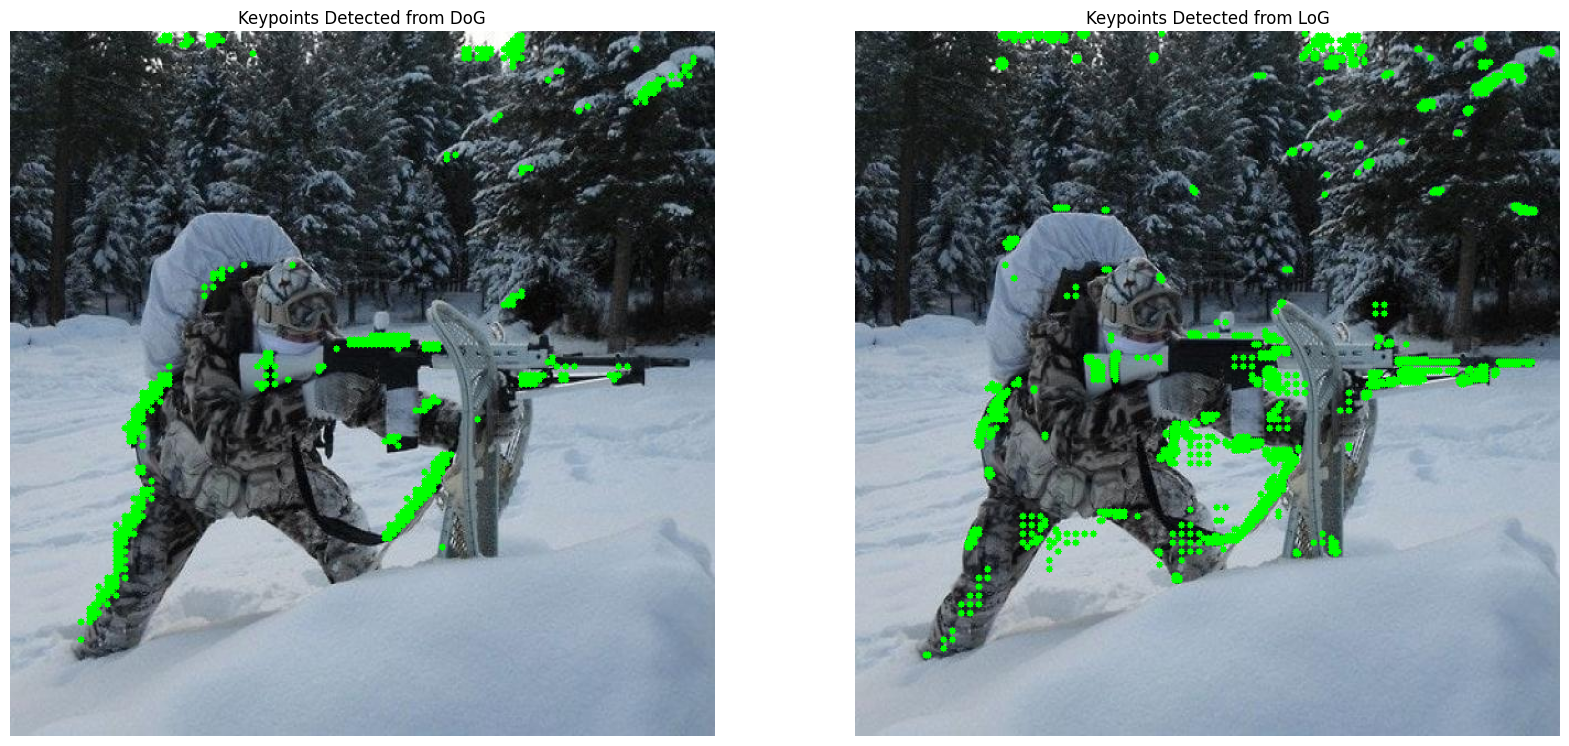

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(keypoints_image, cv2.COLOR_BGR2RGB))
plt.title('Keypoints Detected from DoG')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(keypoints_log_image, cv2.COLOR_BGR2RGB))
plt.title('Keypoints Detected from LoG')
plt.axis('off')

plt.show()